In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [46]:
df1 = pd.read_excel('Training-Restated.xlsx')
df2 = pd.read_csv('result_df.csv')

print(df1.columns)
print(df2.columns)

Index(['Match ID 18Char', 'Completion Date', 'Match Support Contact Notes',
       'Stage', 'Little ID', 'Big ID', 'Big County', 'Big Age',
       'Big Occupation', 'Big: Military', 'Big Approved Date',
       'Big Level of Education', 'Big Languages', 'Big Gender',
       'Big Birthdate', 'Big Employer', 'Program', 'Program Type',
       'Big Race/Ethnicity', 'Closure Reason', 'Closure Details',
       'Match Activation Date', 'Match Closure Meeting Date',
       'Rationale for Match', 'Big Enrollment: Record Type',
       'Big Assessment Uploaded', 'Big Acceptance Date', 'Big Car Access',
       'Big Days Acceptance to Match', 'Big Days Interview to Acceptance',
       'Big Days Interview to Match', 'Big Open to Cross-Gender Match',
       'Big Re-Enroll', 'Big Contact: Preferred Communication Type',
       'Big Contact: Former Big/Little',
       'Big Contact: Interest Finder - Sports',
       'Big Contact: Interest Finder - Places To Go',
       'Big Contact: Interest Finder - Hobb

In [47]:
df1['Stage'].unique()

array(['Closed', 'Active', 'Pending Closure'], dtype=object)

In [48]:
df1 = df1[df1['Stage'] == 'Closed']

In [49]:
# merge df
df1 = df1[['Match ID 18Char', 'Completion Date','Closure Reason','Match Length','Match Activation Date']]
df1['Days since match activation'] = (pd.to_datetime(df1['Completion Date']) - pd.to_datetime(df1['Match Activation Date'])).dt.days
df2['Completion_Date'] = pd.to_datetime(df2['Completion_Date'])
df2 = df2[['Match_ID', 'Completion_Date','Cleaned_MSC_Notes','Sentiment', 'Keywords']]
df = pd.merge(df1, df2, left_on=['Match ID 18Char', 'Completion Date'], right_on=['Match_ID', 'Completion_Date'], how='inner')

df = df.drop(['Match ID 18Char', 'Completion Date'], axis=1)
df.head()

,Closure Reason,Match Length,Match Activation Date,Days since match activation,Match_ID,Completion_Date,Cleaned_MSC_Notes,Sentiment,Keywords
0,Volunteer: Health,9.0,2017-03-03,272.0,a1v2J0000028pRvQAI,2017-11-30,Activities:See mss notes.MSS Notes:Match Closi...,3 stars,"['match', 'contact', 'thanks', 'closing', 'lit..."
1,Volunteer: Health,9.0,2017-03-03,242.0,a1v2J0000028pRvQAI,2017-10-31,Activities:See MSS notes.MSS Notes:See Comm lo...,1 star,"['match', 'notes', 'see', 'msc', 'mss', 'closi..."
2,Volunteer: Health,9.0,2017-03-03,273.0,a1v2J0000028pRvQAI,2017-12-01,Activities:Match Closed.MSS Notes:Match Closed.,1 star,"['match', 'closed', 'notes', 'mss', 'activities']"
3,Volunteer: Health,9.0,2017-03-03,87.0,a1v2J0000028pRvQAI,2017-05-29,Activities:Msc asked about activities. Bs said...,4 stars,"['msc', 'match', 'plan', 'suggested', 'concern..."
4,Volunteer: Health,9.0,2017-03-03,58.0,a1v2J0000028pRvQAI,2017-04-30,Activities:Msc asked about activities. Bs said...,4 stars,"['said', 'asked', 'msc', 'match', 'activities'..."


<h2>ANALYSIS FOR: Consider the Match Support Contact Notes open text field.  Are there key words, phrases, or sentiments within this field that are related to Closure Reason?</h2>

IN OTHER WORDS, FIND IS THERE'S ANY RELATION BETWEEN KEYWORDS/SENTIMENT AND CLOSURE REASON.


In [50]:
from wordcloud import WordCloud

In [51]:
print(df['Closure Reason'].unique())

['Volunteer: Health' 'Child/Family: Feels incompatible with volunteer'
 'Volunteer: Moved' 'Child/Family: Moved'
 'Volunteer: Feels incompatible with child/family' 'Child: Graduated'
 'Child: Lost interest' 'Volunteer: Lost contact with child/agency'
 'Child/Family: Lost contact with agency'
 'Child/Family: Lost contact with volunteer/agency'
 'Child: Family structure changed'
 'Child/Family: Lost contact with volunteer'
 'Child: Severity of challenges' 'Successful match closure'
 'Volunteer: Time constraint' 'Child/Family: Moved out of service area'
 'Volunteer: Moved out of service area' 'Child/Family: Time constraints'
 'Volunteer: Lost contact with agency' 'COVID impact'
 'Volunteer: Deceased' 'Volunteer: Lost contact with child/family'
 'Volunteer: Infraction of match rules/agency policies'
 'Volunteer: Unrealistic expectations'
 'Agency: Challenges with program/partnership'
 'Child/Family: Unrealistic expectations'
 'Volunteer: Changed workplace/school partnership' nan
 'Child: C

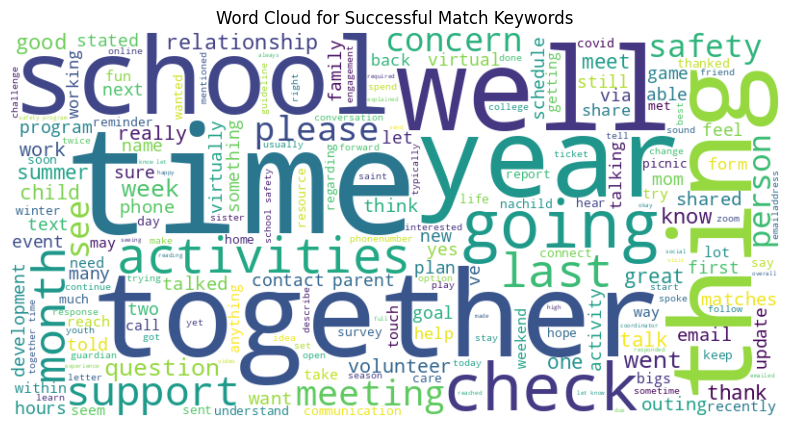

In [52]:
succesful_closure_resons = ['Successful match closure', 'Child: Graduated']

successful_matches = df[df['Closure Reason'].isin(succesful_closure_resons)]

# get keywords for creating wordcloud
all_keywords = successful_matches['Keywords'].apply(lambda x: re.findall(r'\b\w+\b', x)).explode().tolist()

# remove unwanted words
words_to_remove = ['match','time ','said', 'ay', 'mec','bfirstname','gat','ca','ach',
                   'st','mss','emailaddss','lfirstname','lfirname',
                   'would','ay','la','etc','www','https','bbbs','msc','little','big',
                   'notes','ll','re','bbs','queion','l','n', 'asked'
                   ]

all_keywords = [word for word in all_keywords if word.lower() not in words_to_remove]

wordcloud_text = ' '.join(all_keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Successful Match Keywords')
plt.axis('off')
plt.show()


Can't derive much information from this word cloud. Let's see for what it's like for other closure reason.

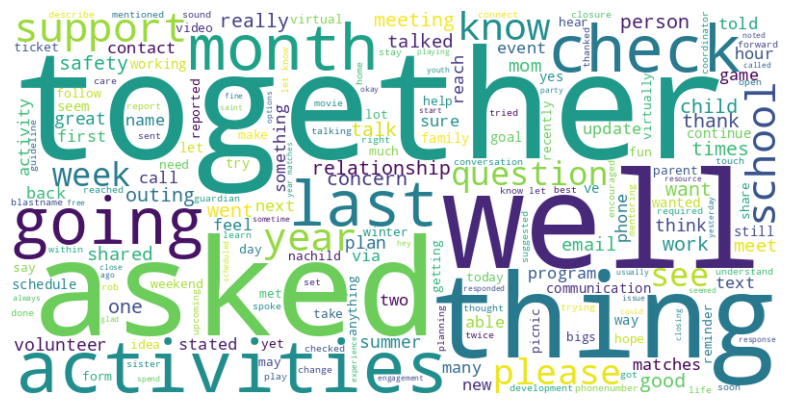

In [53]:

# Define unsuccessful closure reasons
unsuccessful_closure_reasons = [
    'Child/Family: Feels incompatible with volunteer', 'Volunteer: Feels incompatible with child/family',
    'Child: Lost interest', 'Volunteer: Infraction of match rules/agency policies',
    'Volunteer: Unrealistic expectations', 'Child/Family: Unrealistic expectations',
    'Child/Family: Infraction of match rules/agency policies', 'Agency: Concern with Volunteer re: child safety'
]

# Filter unsuccessful matches
unsuccessful_matches = df[df['Closure Reason'].isin(unsuccessful_closure_reasons)]

# Extract and clean keywords
all_keywords2 = unsuccessful_matches['Keywords'].apply(lambda x: re.findall(r'\b\w+\b', x)).explode().tolist()

# Remove unwanted words
words_to_remove = {'match', 'time', 'said', 'ay', 'mec', 'little', 'bfirstname', 'gat', 'ca', 'ach', 'st',
                   'mss', 'emailaddss', 'lfirstname', 'lfirname', 'would', 'la', 'etc', 'www', 'https',
                   'bbbs', 'msc', 'big', 'notes', 'll', 're'}

all_keywords2 = [word for word in all_keywords2 if word.lower() not in words_to_remove]

# Convert list back to a single string
wordcloud_text = ' '.join(all_keywords2)

# Generate and display WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


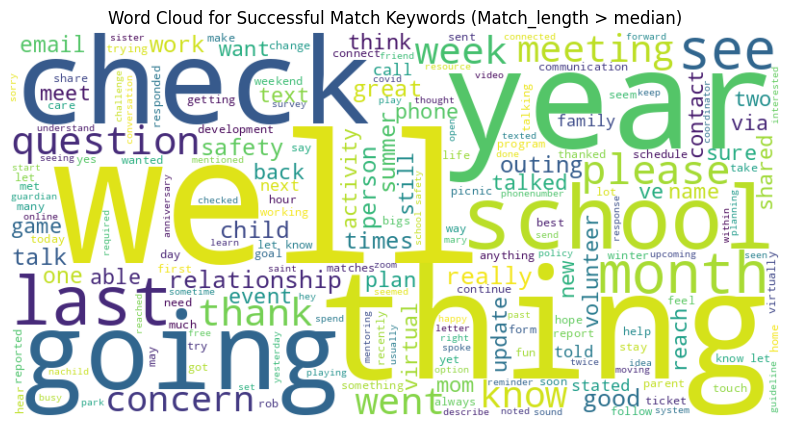

In [54]:
# successful matches by match_length, i.e. match length more than median
from statistics import median
successful_matches = df[df['Match Length'] > median(df['Match Length'])]

# get keywords for creating wordcloud
all_keywords = successful_matches['Keywords'].apply(lambda x: re.findall(r'\b\w+\b', x)).explode().tolist()

# remove unwanted words
words_to_remove = ['match','time ','said', 'ay', 'mec','bfirstname','gat','ca','ach',
                   'st','mss','emailaddss','lfirstname','lfirname',
                   'would','ay','la','etc','www','https','bbbs','msc','little','big',
                   'notes','ll','re','bbs','queion','l','n', 'asked', 'together', 'time', 'support','activities'
                   ]

all_keywords = [word for word in all_keywords if word.lower() not in words_to_remove]

wordcloud_text = ' '.join(all_keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Successful Match Keywords (Match_length > median)')
plt.axis('off')
plt.show()

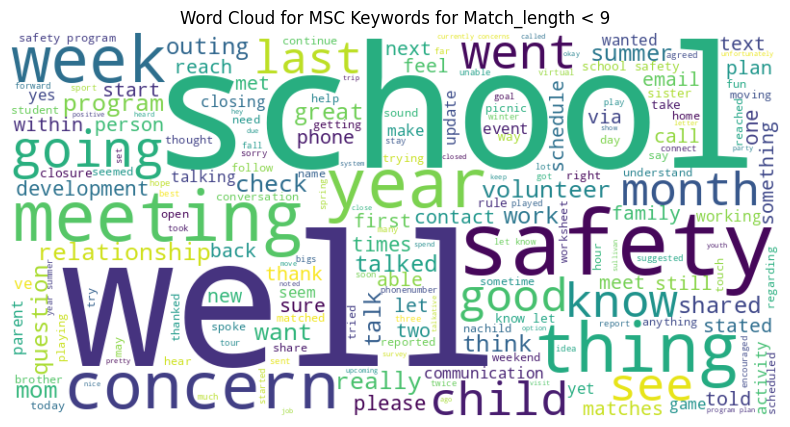

In [55]:
# unsuccessful matches by match_length, i.e. match length less than 12
unsuccessful_matches = df[df['Match Length'] < 9]

# get keywords for creating wordcloud
all_keywords = unsuccessful_matches['Keywords'].apply(lambda x: re.findall(r'\b\w+\b', x)).explode().tolist()

# remove unwanted words
words_to_remove = ['match','time ','said', 'ay', 'mec','bfirstname','gat','ca','ach',
                   'st','mss','emailaddss','lfirstname','lfirname',
                   'would','ay','la','etc','www','https','bbbs','msc','little','big',
                   'notes','ll','re','bbs','queion','l','n', 'asked', 'together', 'time', 'support','activities'
                   ]

all_keywords = [word for word in all_keywords if word.lower() not in words_to_remove]

wordcloud_text = ' '.join(all_keywords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for MSC Keywords for Match_length < 9')
plt.axis('off')
plt.show()

Bar plot of avg sentiment vs closure reason

In [56]:
# converting sentiment to numeric
df['Sentiment'] = df['Sentiment'].apply(lambda x: str(x).split(' ')[0])
df['Sentiment'] = pd.to_numeric(df['Sentiment'])
df['Sentiment']


,Sentiment
0,3
1,1
2,1
3,4
4,4
...,...
26253,4
26254,5
26255,5
26256,4


Text(0.5, 1.0, 'Average Sentiment by Closure Reason')

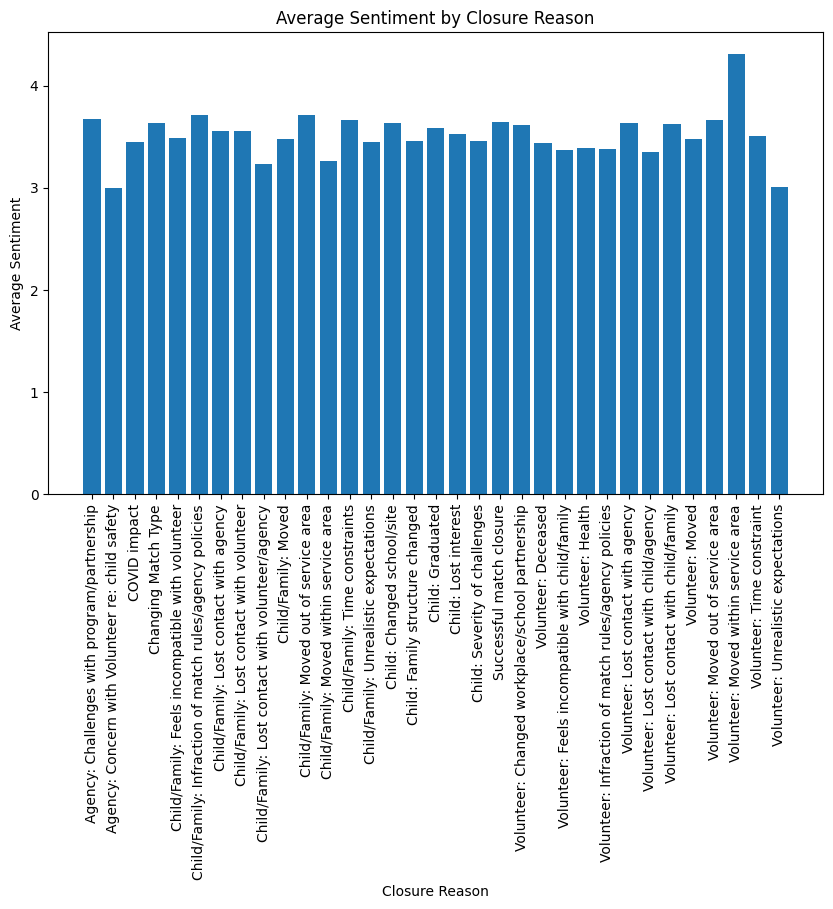

In [57]:
df_closure_reason = df.groupby('Closure Reason')['Sentiment'].mean().reset_index()

# bar plot sentiment and closure reason
plt.figure(figsize=(10, 6))
plt.bar(df_closure_reason['Closure Reason'], df_closure_reason['Sentiment'])
plt.xticks(rotation=90)
plt.xlabel('Closure Reason')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Closure Reason')

Create a classification chart for each closure reason with avg sentiment of
each match.

In [58]:
# avg sentiment by match_id
df_sentiment_by_match = df.groupby('Match_ID')['Sentiment'].mean().reset_index()
df_sentiment_by_match = pd.merge(df_sentiment_by_match, df[['Match_ID', 'Closure Reason', 'Match Length']], on='Match_ID', how='left')
#rename column sentiment
df_sentiment_by_match.rename(columns={'Sentiment': 'Avg_Sentiment'}, inplace=True)
df_sentiment_by_match.head()

,Match_ID,Avg_Sentiment,Closure Reason,Match Length
0,a1v2J0000027CWYQA2,4.0,Child: Graduated,5.5
1,a1v2J0000027CWYQA2,4.0,Child: Graduated,5.5
2,a1v2J0000027CWYQA2,4.0,Child: Graduated,5.5
3,a1v2J0000027CWfQAM,3.2,Child: Lost interest,8.5
4,a1v2J0000027CWfQAM,3.2,Child: Lost interest,8.5


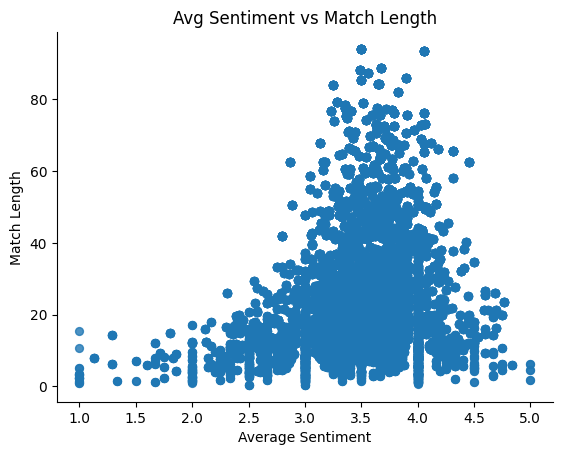

In [59]:
# @title Avg_Sentiment vs Match Length

from matplotlib import pyplot as plt
df_sentiment_by_match.plot(kind='scatter', x='Avg_Sentiment', y='Match Length', s=32, alpha=.8)
plt.title('Avg Sentiment vs Match Length')
plt.xlabel('Average Sentiment')
plt.ylabel('Match Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

Matches with high match length tend to skew towards positive sentiment. No match with negative sentiment has high match length.

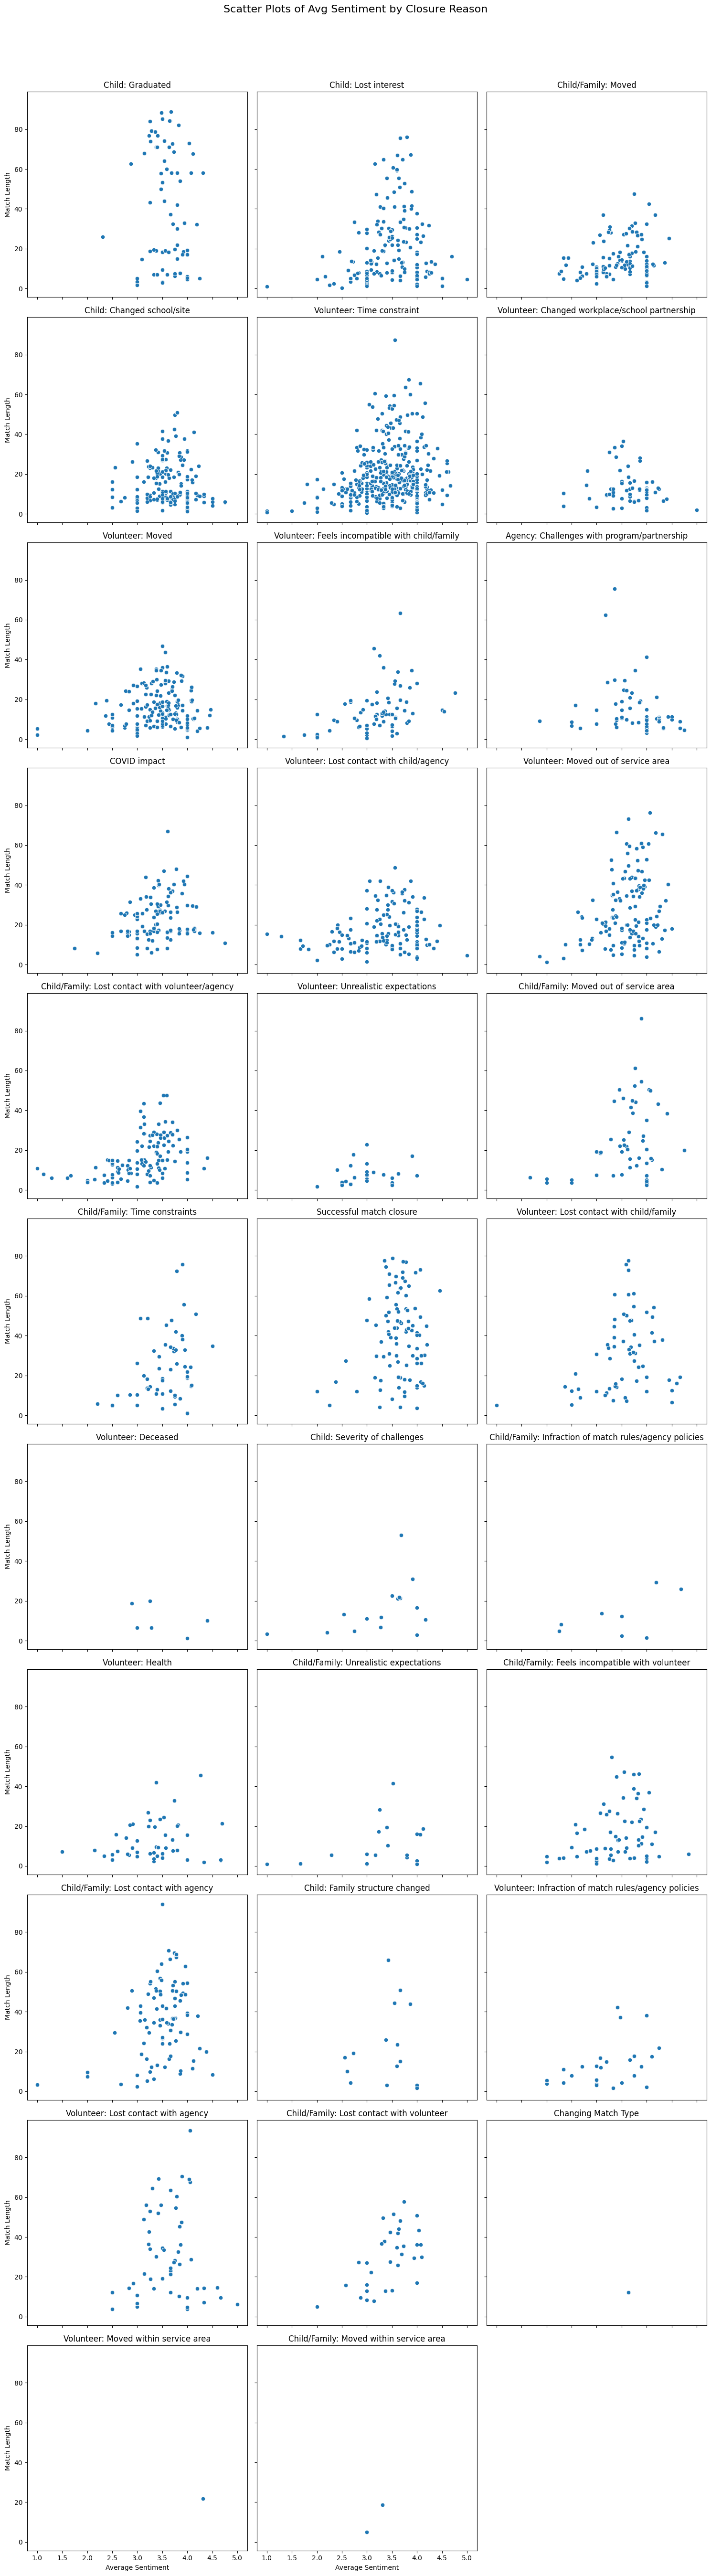

In [60]:
#Create a classification scatter plot for each closure reason with avg sentiment of each match

df_sentiment_by_match = df_sentiment_by_match.groupby('Closure Reason').filter(lambda x: len(x) >= 10)

# Get unique closure reasons
closure_reasons = df_sentiment_by_match['Closure Reason'].unique()
num_reasons = len(closure_reasons)

# Calculate grid dimensions
num_cols = 3  # Number of columns in the grid
num_rows = (num_reasons + num_cols - 1) // num_cols  # Calculate number of rows

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharex=True, sharey=True)
fig.suptitle('Scatter Plots of Avg Sentiment by Closure Reason', fontsize=16)

# Iterate and plot
for i, reason in enumerate(closure_reasons):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_reasons > 1 else axes  # Handle single subplot case
    reason_data = df_sentiment_by_match[df_sentiment_by_match['Closure Reason'] == reason]
    if len(reason_data) > 10:
      sns.scatterplot(data=reason_data, x='Avg_Sentiment', y='Match Length', ax=ax)
      ax.set_title(reason)
      ax.set_xlabel('Average Sentiment')
      ax.set_ylabel('Match Length')

# Remove empty subplots if any
if num_reasons < num_rows * num_cols:
    for i in range(num_reasons, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

Interesting insights from the above chart:

1) No matches with high match length have negative sentiment. In other words, all the negative sentiments have low match length. That shows our sentiment analyzer is working?


2) If the volunteer is not healthy, matches does not seem to last long eventhough the sentiment is positive.


3) Matches with little who graduated seems to have high match length and positive sentiment.


4) Child/Family feels incompatible with volunteer at around 20 month mark. Why?


5) All successful match closures have pretty positive sentiment and high match length.


6) Any other thoughts?

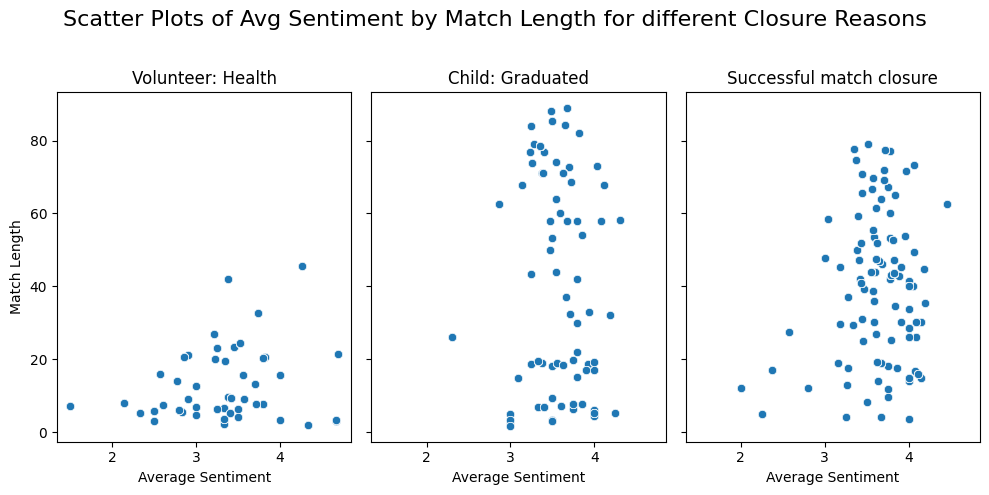

In [61]:
closure_reasons = ['Volunteer: Health', 'Child: Graduated', 'Successful match closure']
num_reasons = len(closure_reasons)

# Calculate grid dimensions
num_cols = 3  # Number of columns in the grid
num_rows = (num_reasons + num_cols - 1) // num_cols  # Calculate number of rows

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows), sharex=True, sharey=True)
fig.suptitle('Scatter Plots of Avg Sentiment by Match Length for different Closure Reasons', fontsize=16)

# Iterate and plot
for i, reason in enumerate(closure_reasons):
    row = i // num_cols
    col = i % num_cols
    ax = axes[col] if num_reasons > 1 else axes  # Handle single subplot case
    reason_data = df_sentiment_by_match[df_sentiment_by_match['Closure Reason'] == reason]
    if len(reason_data) > 10:
      sns.scatterplot(data=reason_data, x='Avg_Sentiment', y='Match Length', ax=ax)
      ax.set_title(reason)
      ax.set_xlabel('Average Sentiment')
      ax.set_ylabel('Match Length')

# Remove empty subplots if any
if num_reasons < num_rows * num_cols:
    for i in range(num_reasons, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
plt.show()

Trend (line) chart for closure reason vs sentiment. Basically, how's the sentiment changing with the passing days, until closure for each category of closure reason.

In [62]:
df.head()

,Closure Reason,Match Length,Match Activation Date,Days since match activation,Match_ID,Completion_Date,Cleaned_MSC_Notes,Sentiment,Keywords
0,Volunteer: Health,9.0,2017-03-03,272.0,a1v2J0000028pRvQAI,2017-11-30,Activities:See mss notes.MSS Notes:Match Closi...,3,"['match', 'contact', 'thanks', 'closing', 'lit..."
1,Volunteer: Health,9.0,2017-03-03,242.0,a1v2J0000028pRvQAI,2017-10-31,Activities:See MSS notes.MSS Notes:See Comm lo...,1,"['match', 'notes', 'see', 'msc', 'mss', 'closi..."
2,Volunteer: Health,9.0,2017-03-03,273.0,a1v2J0000028pRvQAI,2017-12-01,Activities:Match Closed.MSS Notes:Match Closed.,1,"['match', 'closed', 'notes', 'mss', 'activities']"
3,Volunteer: Health,9.0,2017-03-03,87.0,a1v2J0000028pRvQAI,2017-05-29,Activities:Msc asked about activities. Bs said...,4,"['msc', 'match', 'plan', 'suggested', 'concern..."
4,Volunteer: Health,9.0,2017-03-03,58.0,a1v2J0000028pRvQAI,2017-04-30,Activities:Msc asked about activities. Bs said...,4,"['said', 'asked', 'msc', 'match', 'activities'..."


In [63]:
# monthly bin relative to match start
df['Month_Since_Activation'] = df['Days since match activation'] // 30
df['Month_Since_Activation'] = df['Month_Since_Activation'].astype(int)
df_monthly_bin = df.groupby(['Closure Reason', 'Month_Since_Activation'])['Sentiment'].mean().reset_index()
df_monthly_bin.head()

,Closure Reason,Month_Since_Activation,Sentiment
0,Agency: Challenges with program/partnership,0,4.015385
1,Agency: Challenges with program/partnership,1,3.940000
2,Agency: Challenges with program/partnership,2,3.656250
3,Agency: Challenges with program/partnership,3,3.885714
4,Agency: Challenges with program/partnership,4,3.650000


In [64]:
print(df_monthly_bin[(df_monthly_bin['Closure Reason']== 'Successful match closure') & (df_monthly_bin['Month_Since_Activation']> 67)])

               Closure Reason  Month_Since_Activation  Sentiment
917  Successful match closure                      68   4.333333
918  Successful match closure                      69   3.333333
919  Successful match closure                      70   4.500000
920  Successful match closure                      71   1.000000
921  Successful match closure                      72   2.500000
922  Successful match closure                      73   3.333333
923  Successful match closure                      76   4.500000
924  Successful match closure                      77   5.000000


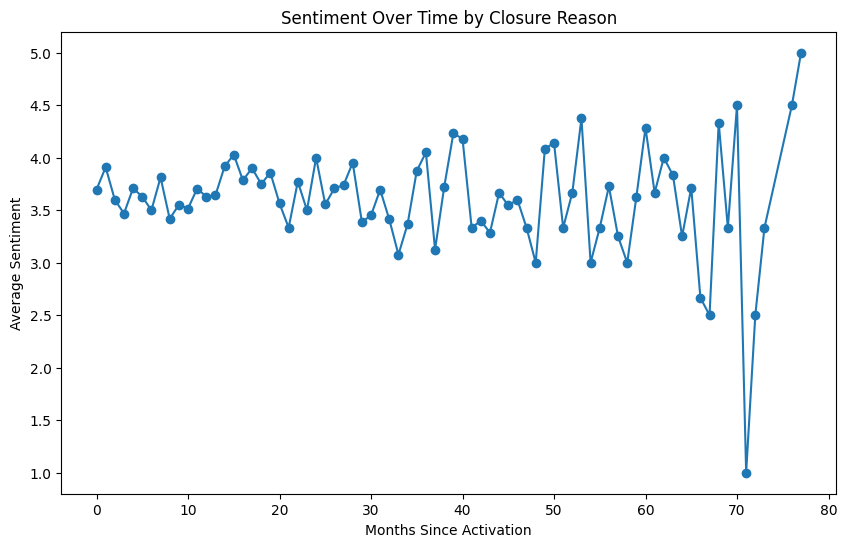

In [65]:
# line plot of month_since_activation vs sentiment for each closure reason
plt.figure(figsize=(10,6))
# for reason in df_monthly_bin['Closure Reason'].unique():
#     subset = df_monthly_bin[df_monthly_bin['Closure Reason'] == reason]
#     plt.plot(subset['Month_Since_Activation'], subset['Sentiment'], marker='o', label=reason)

subset = df_monthly_bin[df_monthly_bin['Closure Reason'] == 'Successful match closure']
plt.plot(subset['Month_Since_Activation'], subset['Sentiment'], marker='o', label='Successful match closure')
plt.xlabel('Months Since Activation')
plt.ylabel('Average Sentiment')
plt.title('Sentiment Over Time by Closure Reason')
# plt.legend(title='Closure Reason Code')
plt.show()

In [68]:
# sentiment comparison between early stage and late stage of matches
df['relative_time'] =  df['Month_Since_Activation'] / df['Match Length']
early_stage = df[df['relative_time'] <= 0.3] # first 30% of the match
late_stage = df[df['relative_time'] >= 0.7] # last 30% of the match


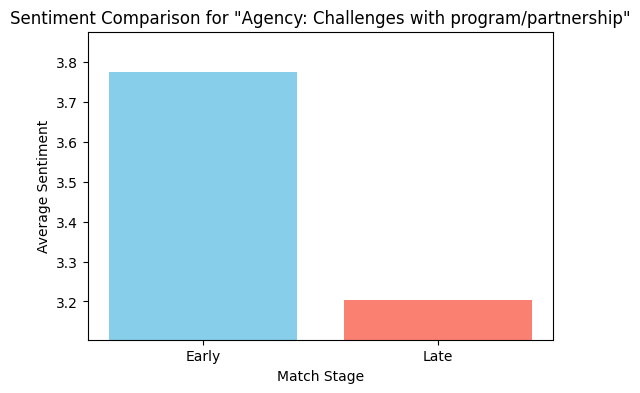

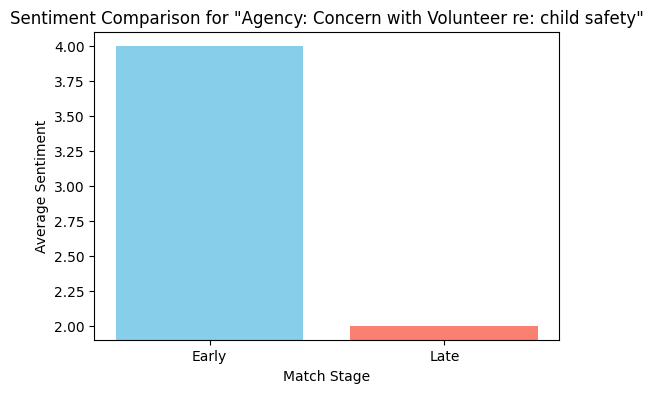

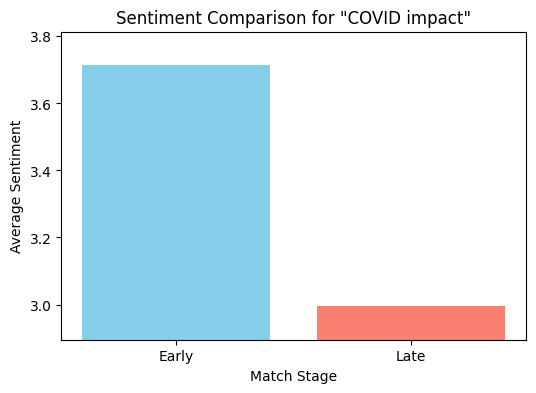

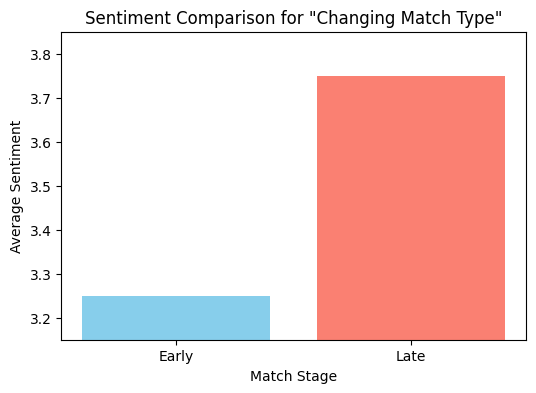

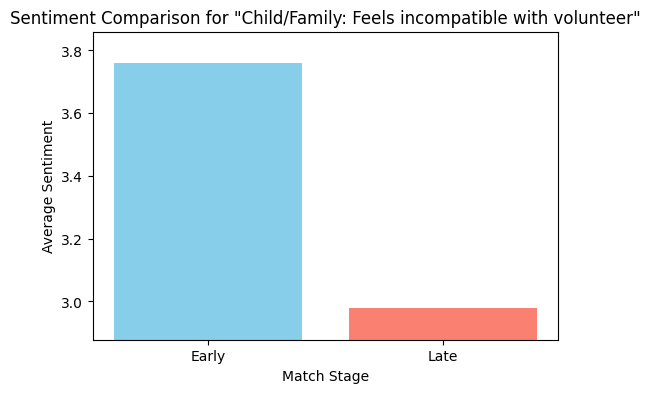

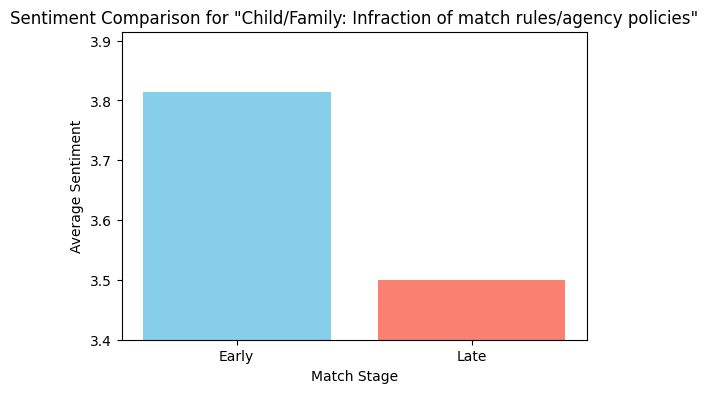

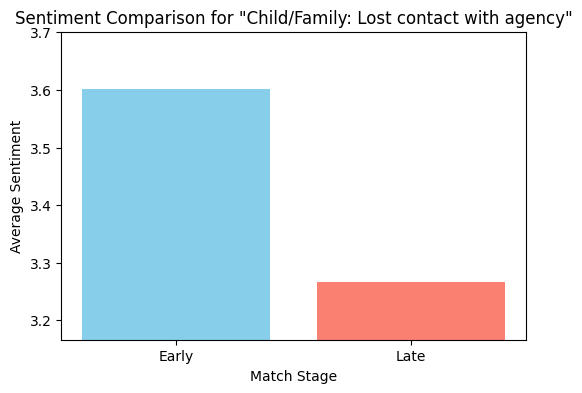

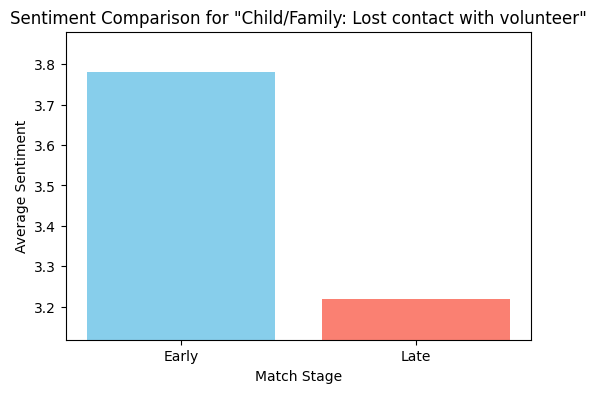

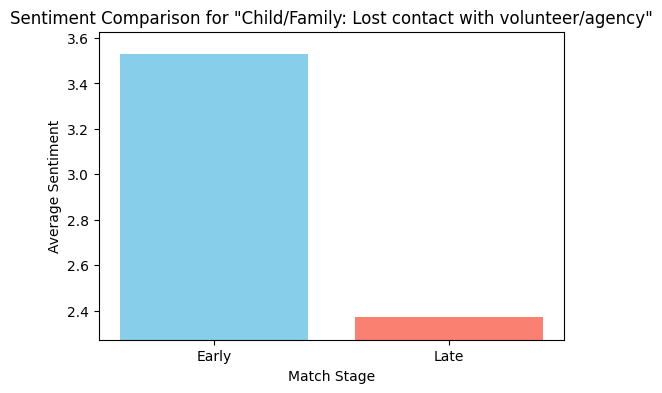

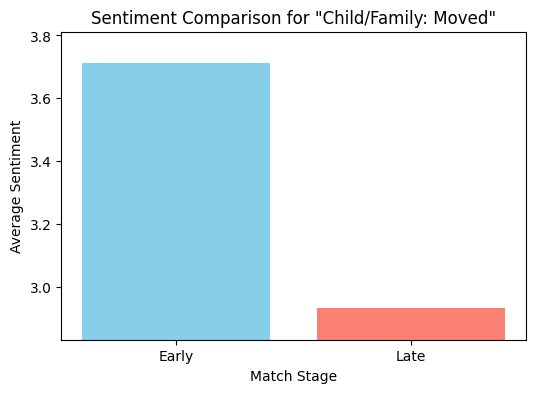

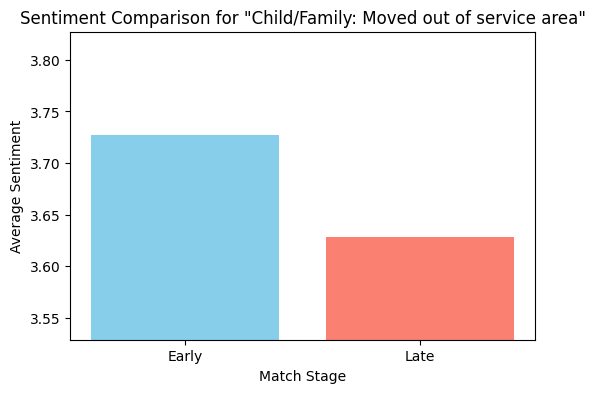

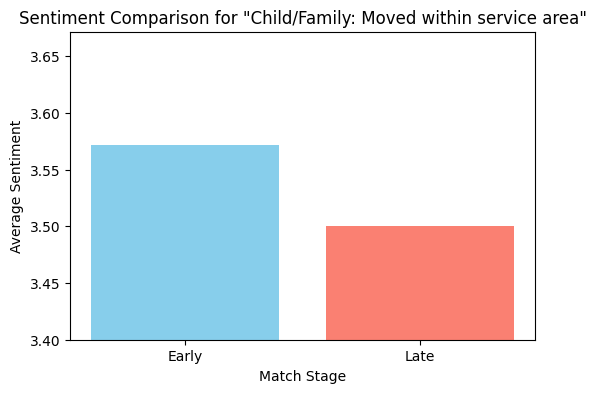

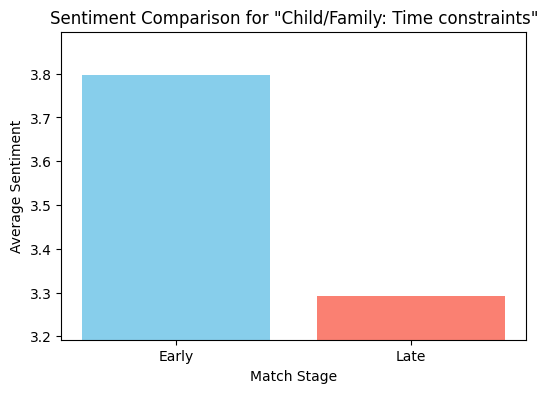

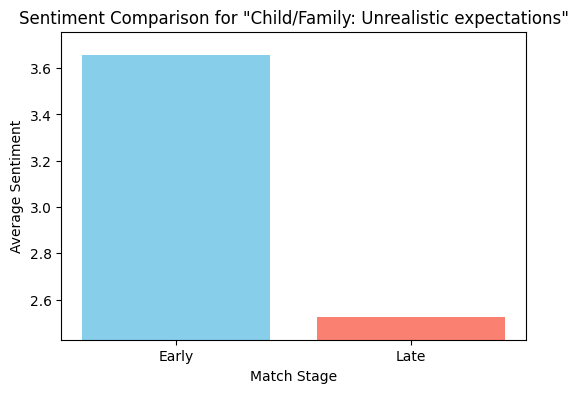

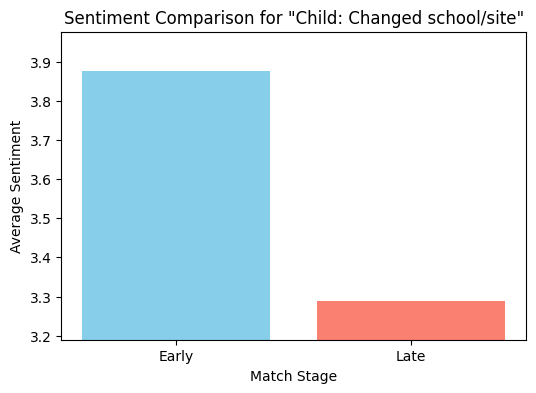

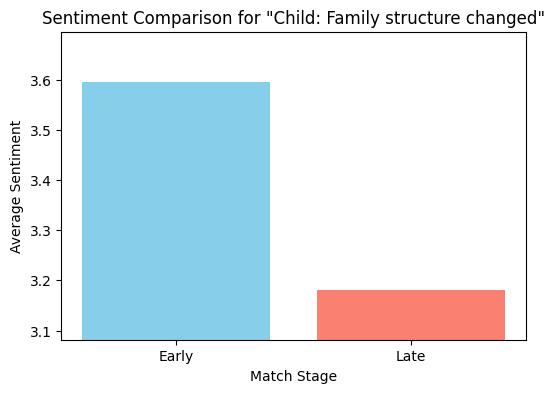

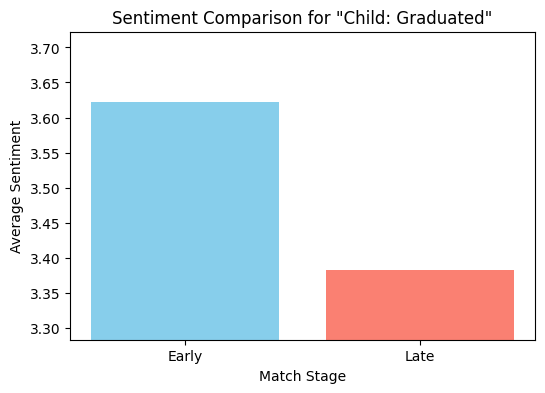

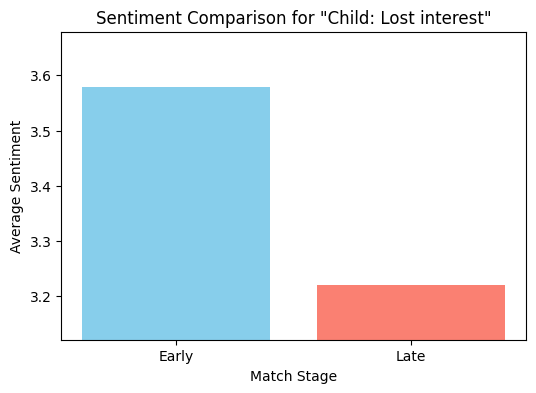

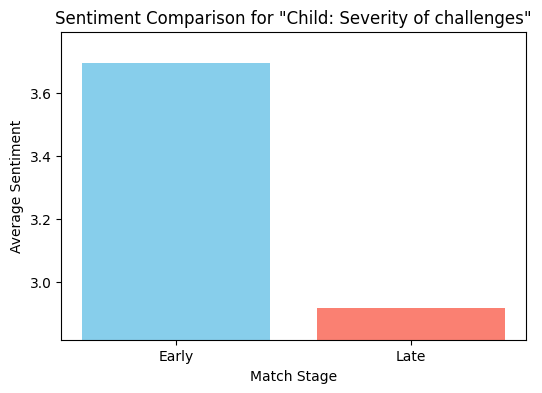

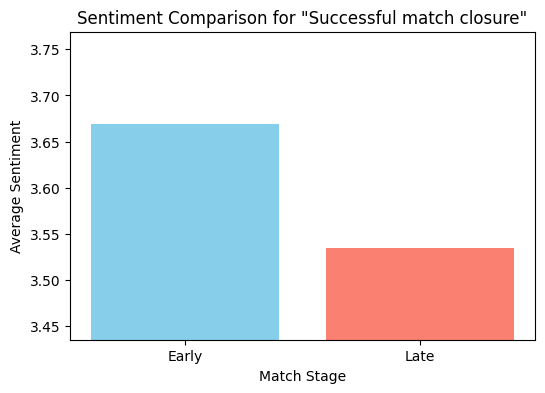

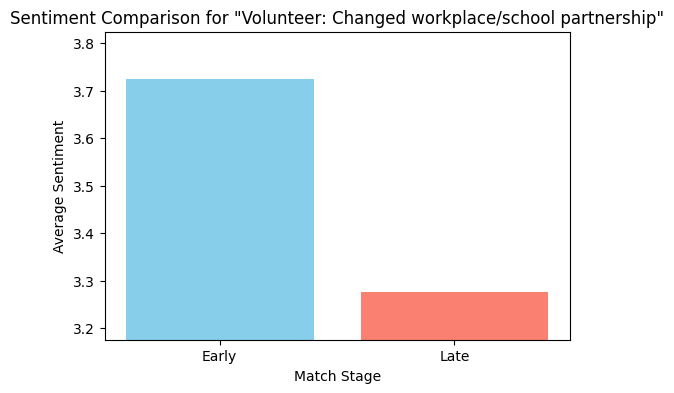

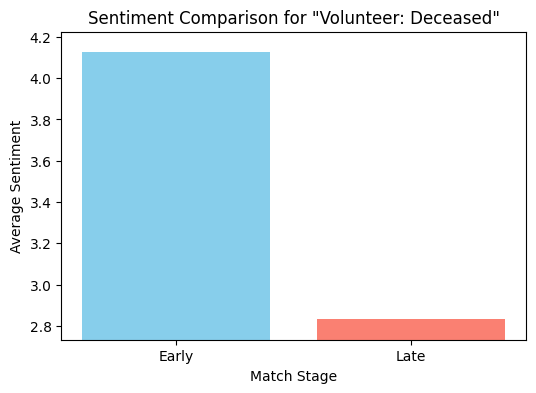

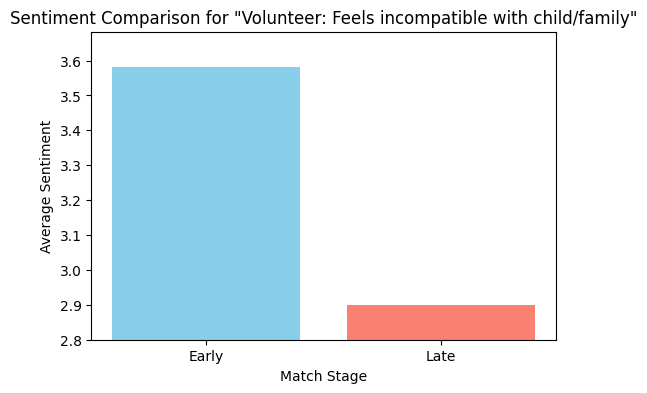

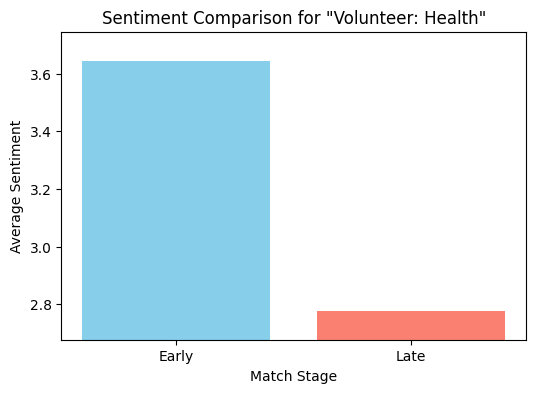

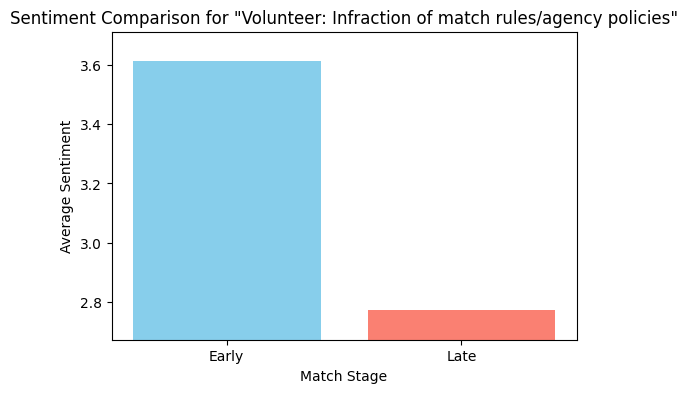

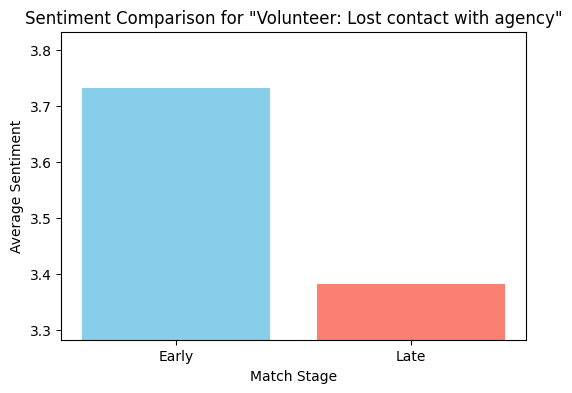

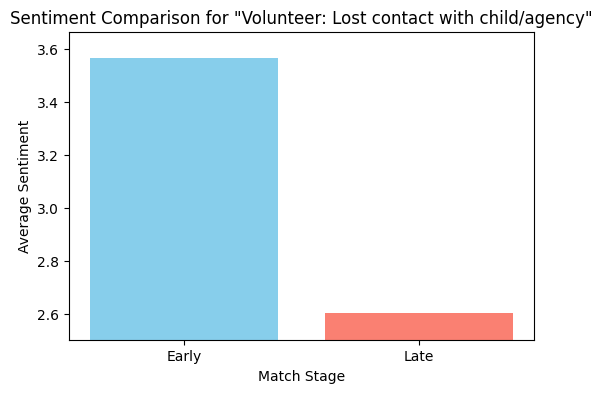

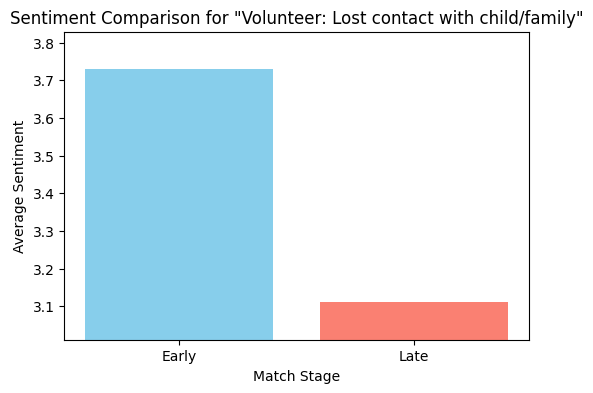

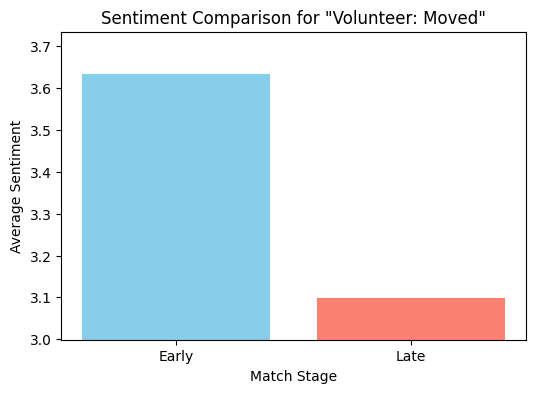

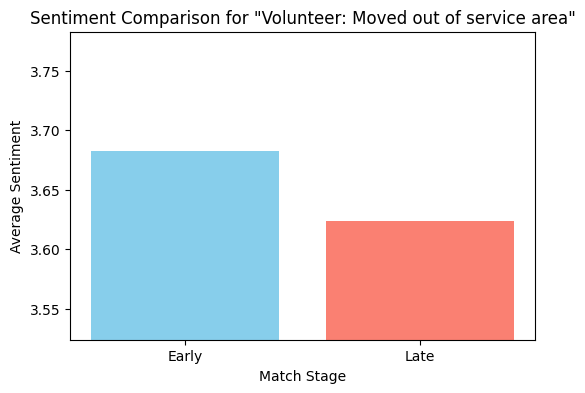

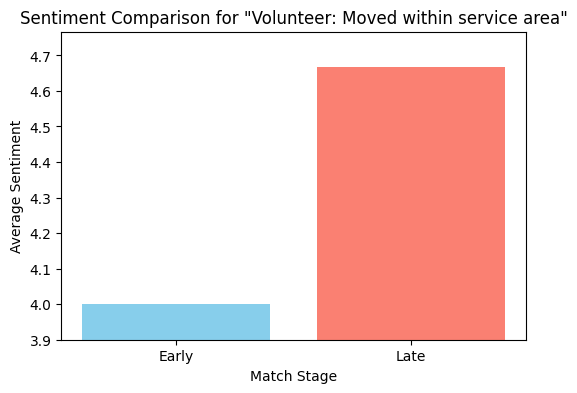

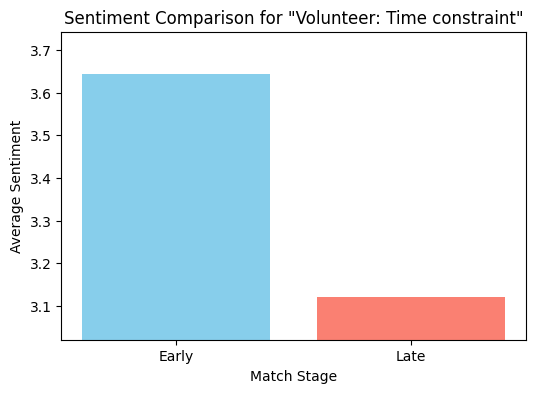

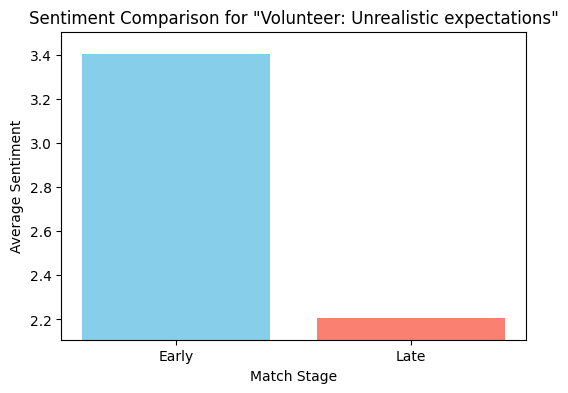

In [74]:
early_stage_sentiment = early_stage.groupby('Closure Reason')['Sentiment'].mean().reset_index()
late_stage_sentiment = late_stage.groupby('Closure Reason')['Sentiment'].mean().reset_index()

for reason in early_stage_sentiment['Closure Reason'].unique():
    early_stage_subset = early_stage_sentiment[early_stage_sentiment['Closure Reason'] == reason]['Sentiment'].values[0]
    late_stage_subset = late_stage_sentiment[late_stage_sentiment['Closure Reason'] == reason]['Sentiment'].values[0]

    stages = ['Early', 'Late']
    sentiments = [early_stage_subset, late_stage_subset]

    # Plot the comparison as a bar chart
    plt.figure(figsize=(6, 4))
    plt.bar(stages, sentiments, color=['skyblue', 'salmon'])
    plt.title(f'Sentiment Comparison for "{reason}"')
    plt.xlabel('Match Stage')
    plt.ylabel('Average Sentiment')
    plt.ylim(min(sentiments) - 0.1, max(sentiments) + 0.1)
    plt.show()

    # plot early stage sentiment vs late stage sentiment




<h2> ANALYSIS FOR: Are there key words, phrases, or sentiments within this field that are related to Match Length?</h2>

IN ORTHER WORDS KEYWORDS/SENTIMENT VS MATCH LENGTH


\<h4> What was the sentiment like 3-6 month before match closure? </h4>